## Nikolaos Papadopoulos

#### Course: Numerical Optimization and Large Scale Linear Algebra

#### 3rd assignment: Constrained Least Squares

In this assignment we were tasked with solving a problem using the constrained least squares(CLS) formula and formulating the minimum energy optimal control problem.

 $$\begin{bmatrix} s_1(t+1)\\ s_2(t+1) \end{bmatrix} = \begin{bmatrix} 1&1\\ 0&0.95 \end{bmatrix}\begin{bmatrix} s_1(t)\\ s_2(t) \end{bmatrix}+ \begin{bmatrix} 0\\ 0.1 \end{bmatrix} u(t),\;\;\;\; t=0,1,2,... $$ 

$s_1(t)$ is the position,$s_2(t)$ is the velocity and $u(t)$ is the actuator input at time t.


We assume that the vehicle is initially at rest

$s_1(0) = s_2(0) = 0$

We calculate that $$ s_1(t+1)=s_1(t)+s_2(t) \;\;\; (1) $$ 

but $s_1(t) = s_1(t-1) + s_2(t-1)$ and $s_1(t-1) = s_1(t-2)+s_2(t-2)$

So in the end we get

$s_1(t+1) = s_1(t-2)+s_2(t-2) + s_2(t-1) + s_2(t) $

And if we continue until $s_1(1)$ we get
$s_1(t+1) = s_1(0) + \sum_{i=0}^{t-1}s_2(i) = \sum_{i=0}^{t-1}s_2(i)$

When calculating the coefficient of a certain $u(t)$ for $s_1(N)$ ,since multivariable recursive functions like $s_1(N)$ have Polynomial like qualities, the coefficient in the sum of $S_2(t)$ is actually the sum of the coefficient of each $S_2(t)$ respectively.

And $$ s_2(t+1) = 0.95s_2(t) + 0.1u(t) \;\;\;(2) $$ 

#### For equation (2),for N = 3 we get;

$ s_2(3) = 0.95s_2(2) + 0.1u(2) $ and 

$ s_2(2) = 0.95s_2(1) + 0.1u(1) $ and 

$s_2(1) = 0.1u(0) $ because $s_2(0)=0$

So in the end we get

$s_2(3)=0.95(0.95s_2(1)+0.1u(1))+0.1u(2)) = 0.95(0.95*\;0.1u(0)+0.1u(1))+0.1u(2)=0.1(0.95^2u(0)+0.95u(1)+u(2))$

which ultimately means that in $s_2(t)$ the coefficient of $u(k)$ is $0.1*0.95^{t-k-1}$ in its generalised form.

The input sequence must satisfy the constraints;

$ s_1(N)=10 $ and $ s_2(N)=0$

##### Formulating the minimum energy optimal control problem as a least norm problem

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

Clearly state what the variables x, and the problem data C and d are.

The C matrix is of $[2,t]$ dimension and the first line contains the coefficients of $s_1$ which when multiplied with $u(t)$ will give us the final position $s_1(N)=10$.

The second line contains the coefficients of $s_2(N)$ which when multiplied with $u(t)$ will produce the final velocity $s_2(N)=0$.

$$C = \begin{bmatrix}\; \sum_{i=1}^{N-1}0.1\cdot0.95^{i-1}&\sum_{i=1}^{N-2}0.1\cdot0.95^{i-1}&\dots&\sum_{i=1}^{1}(\dots)=0.1&\sum_{i=1}^{N-1-(N-1)}(\dots) = 0&\\ 0.1\cdot0.95^{N-1}&0.1\cdot0.95^{N-2}&\dots&0.1\cdot0.95^1&0.1\cdot0.95^0=0.1\end{bmatrix}$$

The x vector contains all the actuator inputs at times t and is of dimension $[t,1]$.$\;\;\; x=\begin{bmatrix} u(0)\\ u(1) \\...\\u(t) \end{bmatrix}$

The d vector is of dimension $[2,1]$ and contains the two constraints for the final position and velocity respectively.
$d=\begin{bmatrix} 10\\ 0 \end{bmatrix}$

Hence,we are trying to minimize $||x||^2$ which in the exercise is shown to be the total energy consumed which is given by $E=\sum_{t=0}^{N-1}u(t)^2$.This means that we are actually trying to minimize the actuator inputs.

In [2]:
#Formulating d Matrix
d=np.array([10,0]).T

In [3]:
#Initializing function to get C
def formulate_C(t):
    #Creating the 2 vectors 
    s1,s2=[[],[]]
    for k in range(t):
        #Using the above formula for u(t) coefficients
        s2.append((0.95**(t-k-1))*0.1)
    #Last element
    start=0.1    
    for k in range(t):
        #Appending Last element
        s1.append(start)
        #Updating that element
        start=start+(0.95**(k+1))*0.1
    s1final=[s1[k] for k in range(t-2,-1,-1)]
    #Adding this check to fix an error in case t was 0
    if t!=0:
        s1final.append(0)
    C=np.row_stack((s1final,s2))
    return C

##### Solve the problem for N = 30. Plot the optimal u(t), the resulting position s1(t), and velocity s2(t).

In [4]:
C=formulate_C(30)

Now that we acquired our C matrix for N=30,the solution for the least norm problem is calculated with the help of the pseudo-inverse

$$ \hat x^ \;= C^T (CC^T)^{-1}d = C^{\dagger}d $$

We are going to use the numpy library to calculate the pseudo-inverse of C and then multiply it with our d vector to get the optimal x

In [5]:
x=np.dot(np.linalg.pinv(C),d)

#Creating lists that will be used for plotting
s1buffer,s2buffer=[[],[]]

for i in range(len(x)+1):
    Ctest=formulate_C(i)
    s1buffer.append(Ctest[0,:].dot(x[:i]))
    s2buffer.append(Ctest[1,:].dot(x[:i]))

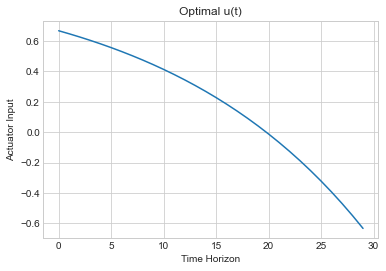

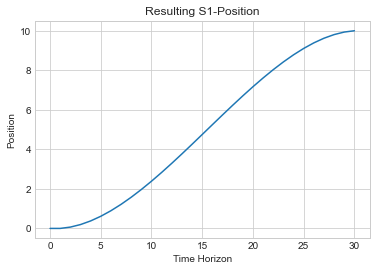

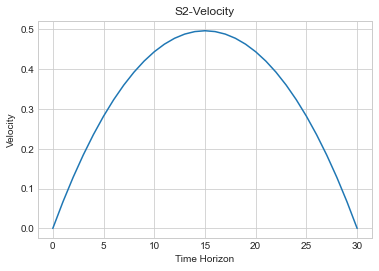

In [6]:
plt.style.use('seaborn-whitegrid')
plt.title('Optimal u(t)')
plt.xlabel('Time Horizon')
plt.ylabel('Actuator Input')
plt.plot(x,label='u')
plt.show()

plt.plot(s1buffer)
plt.title('Resulting S1-Position')
plt.ylabel('Position')
plt.xlabel('Time Horizon')
plt.show()

plt.plot(s2buffer)
plt.ylabel('Velocity')
plt.title('S2-Velocity')
plt.xlabel('Time Horizon')
plt.show()

We see that the position plot finished at Position = 10 and velocity = 0 which satisfy our constraints.
We also notice that the optimal u(t) is a smooth line and that is what we expected since we wanted the minimal energy consumer(Minimum area under curve)

Solve the problem for $N = 2,3,...,29.$ 

For each N calculate the energy E consumed by the optimal input sequence. Plot E versus N. (The plot looks best if you use a logarithmic scale for E)

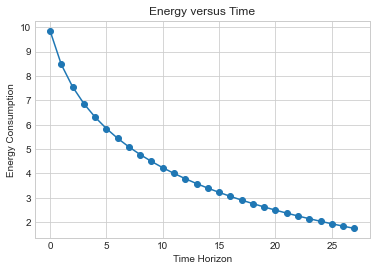

In [7]:
#Question C
E=[]
#Running function for N 2,3...,29 and storing values
for i in range(2,30):
    C=formulate_C(i)
    x=np.dot(np.linalg.pinv(C),d)
    E.append(np.linalg.norm(x)**2)
plt.xlabel('Time Horizon')
plt.ylabel('Energy Consumption')
plt.title('Energy versus Time')
plt.plot(np.log(E),marker='o');

In [8]:
#Question D

Suppose we allow the final position to deviate from 10. However, if
$s_1(N) \neq 10$, we have to pay a penalty, equal to $(s_1(N)-10)^2$.

Find x that minimizes the sum of energy consumed by the input and the terminal position penalty subject to 
constraint $s_2(N)=0$

 $$ \sum_{n=0}^{N-1}u(n)^2 + (s_1(N)-10)^2 $$ 

Formulate this problem as a least norm problem, and solve it for
N = 30. Plot the optimal input signals u(t), the resulting position
s1(t) and the resulting velocity s2(t).

We now want to minimize $||Ax-b||^2$ ,subject to our constraint $s_2(N)=0\;\;(Cx=d)$

We first create an identity matrix(A) of dimension $[30,30]$ and we stack the coefficients of $s_1(N)$ underneath as the last row so now A is $[31,30]$.

b is a vector of 31 lines but we are going to modify the last element to be 10 because that is how we apply the penalty(We need to add -10 so it has to be inserted as the last element)

We are going to use a solver(from scipy) to get the minimum U actuator inputs given the constraint $s_2(N)=0$

In [9]:
C=formulate_C(30)
#Creating A & Stacking last row
A=np.eye(30,30)
A=np.row_stack((A,C[0,:]))
#Creating b vector
B=np.zeros((31,))
#Applying 10 as last element
B[-1]=10

#Define the function that needs to be minimized
def ls(x,a,b):
    return np.linalg.norm(a.dot(x)-b,2)**2

#Define the constraint 
cons = ({'type': 'eq', 'fun': lambda x: np.dot(C[1,:],x)})

#Running solver
U=minimize(ls,args=(A,B),x0=np.ones((30,1)),constraints=cons).x

#Storing s_1 and s_2
q=(np.dot(C[1,:],U))
w=np.dot(C[0,:],U)

#Calculating Energy ||𝐴𝑥−𝑏||2
E=np.linalg.norm(U)**2+(np.dot(C[0,:],U)-10)**2

In [10]:
#Initiating lists
s1buffer,s2buffer=[[],[]]
#Running for N=30
Ctest=formulate_C(30)
#Solver function
U=minimize(ls,args=(A,B),x0=np.ones((30,1)),constraints=cons).x
#Appending every value to plot afterwards
for i in range(len(U)+1):  
    Ctest=formulate_C(i)
    s1buffer.append(np.dot(Ctest[0,:],U[:i]))
    s2buffer.append(np.dot(Ctest[1,:],U[:i]))

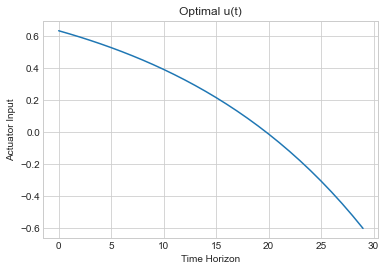

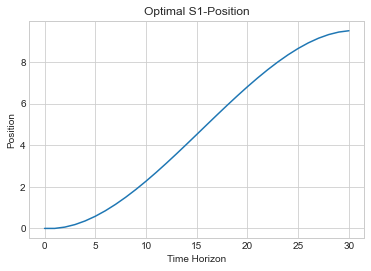

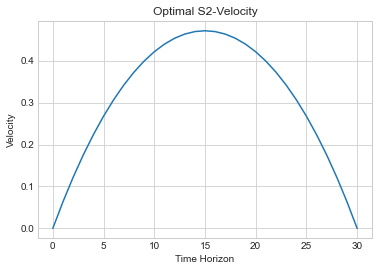

In [11]:
plt.style.use('seaborn-whitegrid')
plt.title('Optimal u(t)')
plt.ylabel('Actuator Input')
plt.xlabel('Time Horizon')
plt.plot(U,label='u')
plt.show()

plt.plot(s1buffer)
plt.title('Optimal S1-Position')
plt.ylabel('Position')
plt.xlabel('Time Horizon')
plt.show()

plt.plot(s2buffer)
plt.ylabel('Velocity')
plt.title('Optimal S2-Velocity')
plt.xlabel('Time Horizon')
plt.show()

We notice that the final position is close to 10 and that is what we expected because we wanted the penalty to be 
as little as possible $(s_1(N)-10)^2$ and that means that the closer the resulting position to 10 is the less energy would be consumed because of the penalty applied.(At least for the energy consumption that depends on the penalty part.)

We also see that the Actuator Input graph is a smooth line and that was expected if the solver worked correctly as
we wouldn't want to have spikes of energy(inputs).

**2) Optional**

In [12]:
def Q2(N):
    s1=[0]
    s2=[]
    for i in range(N):
        s2.append((0.8**(N-1-i))*0.2)
    start=0.2  
    for i in range(N-1):
        s1.append(start)
        start=start+(0.8**(i+1))*0.2  
    s1final=[s1[i] for i in range(N-1,-1,-1)]
    C=np.row_stack((s1final,s2))
    return C


C1=formulate_C(20)
C1=np.column_stack((C1,np.zeros((2,20))))
C2=Q2(20)
C2=np.column_stack((np.zeros((2,20)),C2))
A=np.eye(40,40)
B=np.zeros((40,))


#Define the function that needs to be minimized
def ls(x,a,b):
    return np.linalg.norm(a.dot(x)-b,2)**2

#Define the constraint (sum to one)
cons = ({'type': 'eq', 'fun': lambda x: np.dot(C1[0,:],x)-10},{'type': 'eq', 'fun': lambda x: np.dot(C2[0,:],x)-9},{'type': 'eq', 'fun': lambda x: np.dot(C1[1,:],x)},{'type': 'eq', 'fun': lambda x: np.dot(C2[1,:],x)})


U=minimize(ls,args=(A,B),x0=np.zeros((40,)),constraints=cons).x

s1=(np.dot(C1[0,:],U))
s2=np.dot(C1[1,:],U)
p1=np.dot(C2[0,:],U)
p2=np.dot(C2[1,:],U)

E=(np.linalg.norm(U,2))**2

In [13]:
s1plot,p1plot=[[],[]]
for i in range(21):
    C1plot=formulate_C(i)
    C2plot=Q2(i)
    s1plot.append(C1plot[0,:].dot(U[:i]))
    p1plot.append(C2plot[0,:].dot(U[20:i+20])+1)

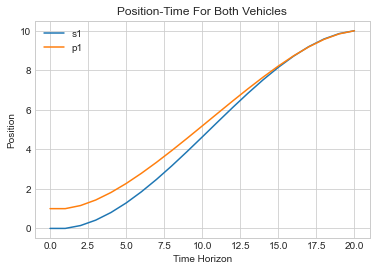

In [14]:
plt.title('Position-Time For Both Vehicles')
plt.ylabel('Position')
plt.xlabel('Time Horizon')
plt.plot(s1plot,label='s1')
plt.plot(p1plot,label='p1')
plt.legend();